In [23]:
%reset -s -f
import os
import pickle
import ase.io
from utils import *
from ase.units import GPa
import matplotlib.pyplot as plt

from matplotlib.ticker import FuncFormatter
def custom_format(x, pos):
    return f"{x:.1f}"

In [24]:
pe_diff = np.loadtxt('data/1_pe_diff.csv')

In [25]:
phase = '1tp'
save_figures = True

In [26]:
plt.rcParams['font.size'] = 24

# 1 Potential energy difference

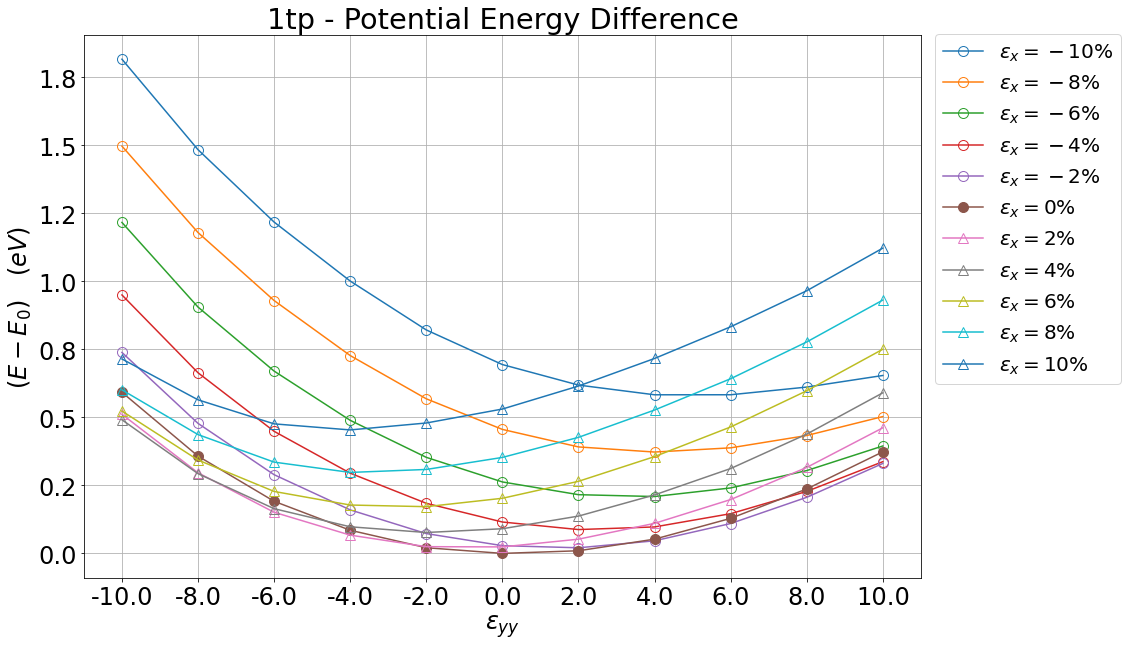

In [27]:
fig,ax = plt.subplots(figsize=(15,10))
ax.set_title(f'{phase} - Potential Energy Difference')
inc = 11
prev = 0
ex = -10
# ax.scatter(0.1, stress_yy[66-1], s=100, c='k')
# ax.plot(np.linspace(-10, 10, num=11), stress_yy[55:55+inc], '-o', label=f'$\epsilon_x={0}$')
for i in range(inc):
#     print(i, prev, prev+inc, ex)
    if ex==0:
        ax.plot(100*np.linspace(-0.1, 0.1, num=11), pe_diff[prev:prev+inc], '-o',
                markersize=10, label=f'$\epsilon_x={ex:>4}\%$')
    elif ex>0:
        ax.plot(100*np.linspace(-0.1, 0.1, num=11), pe_diff[prev:prev+inc], '-^', fillstyle='none', 
                markersize=10, label=f'$\epsilon_x={ex:>4}\%$')
    else:
        ax.plot(100*np.linspace(-0.1, 0.1, num=11), pe_diff[prev:prev+inc], '-o', fillstyle='none', 
                markersize=10, label=f'$\epsilon_x={ex:>4}\%$')
    prev+=inc
    ex+=2
ax.set_xlabel(r'$\epsilon_{yy}$')
ax.set_ylabel('$(E-E_0)\quad (eV)$')
ax.set_xticks(100*np.linspace(-0.1, 0.1, num=11))
# ax.legend(fontsize=18, loc='upper right')
ax.legend(fontsize=20, bbox_to_anchor=(1.005, 1.02))
ax.xaxis.set_major_formatter(FuncFormatter(custom_format))
ax.yaxis.set_major_formatter(FuncFormatter(custom_format))
ax.grid()

if save_figures:
    plt.savefig('figures/1_pe_diff.png', dpi=600, bbox_inches="tight")

# 2 Stress

In [28]:
stress_2d_y = np.loadtxt('data/2_stress_2d_y.csv')

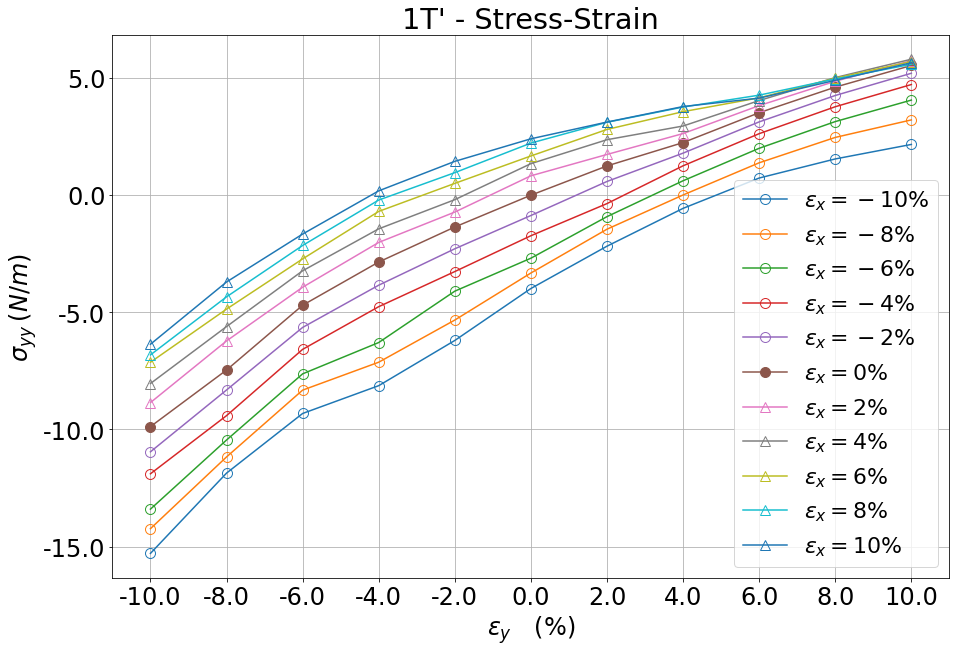

In [29]:
fig,ax = plt.subplots(figsize=(15,10))
ax.set_title(f'1T\' - Stress-Strain')
inc = 11
prev = 0
ex = -10
# ax.scatter(0.1, stress_2d_y[66-1], s=100, c='k')
# ax.plot(np.linspace(-10, 10, num=11), stress_2d_y[55:55+inc]*eV_angs2_to_Nperm, '-o', label=f'$\epsilon_x={ex}$')
for i in range(inc):
#     print(i, prev, prev+inc, ex)
    if ex==0:
        ax.plot(100*np.linspace(-0.1, 0.1, num=11), stress_2d_y[prev:prev+inc], '-o',
                markersize=10, label=f'$\epsilon_x={ex:>4}\%$')
    elif ex>0:
        ax.plot(100*np.linspace(-0.1, 0.1, num=11), stress_2d_y[prev:prev+inc], '-^', fillstyle='none', 
                markersize=10, label=f'$\epsilon_x={ex:>4}\%$')
    else:
        ax.plot(100*np.linspace(-0.1, 0.1, num=11), stress_2d_y[prev:prev+inc], '-o', fillstyle='none', 
                markersize=10, label=f'$\epsilon_x={ex:>4}\%$')
        
#     ax.plot(np.linspace(-0.1, 0.1, num=11), stress_2d_y[prev:prev+inc], '-o', label=f'$\epsilon_x={ex}$')
    prev+=inc
    ex+=2

ax.set_xlabel(r'$\epsilon_y\quad (\%)$')
ax.set_ylabel('$\sigma_{yy}\:(N/m)$')
ax.set_xticks(100*np.linspace(-0.1, 0.1, num=11))
ax.legend(fontsize=22, loc='lower right')
ax.xaxis.set_major_formatter(FuncFormatter(custom_format))
ax.yaxis.set_major_formatter(FuncFormatter(custom_format))
ax.grid()

if save_figures:
    plt.savefig('figures/2_stress_2d_y', dpi=600, bbox_inches="tight")